# AQI Prediction Project - Week 2


In [3]:
# Step 1: Load dataset (from local folder)
import pandas as pd

df = pd.read_csv("C:\\Users\\mahen\\Downloads\\city_day.csv")
print("Data Loaded Successfully!")
df.head()


Data Loaded Successfully!


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
# Step 2: Preprocessing (Week 1 Work)
import numpy as np

# Drop rows with missing AQI values
df = df.dropna(subset=['AQI'])

# Fill missing values in other columns with forward fill/backward fill
df = df.fillna(method='ffill').fillna(method='bfill')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where Date could not be parsed
df = df.dropna(subset=['Date'])

# Feature selection: Keep relevant columns
features = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
target = 'AQI'

df = df[features + [target]].dropna()

print("Data after preprocessing:", df.shape)
df.head()


Data after preprocessing: (24850, 13)


C:\Users\mahen\AppData\Local\Temp\ipykernel_6204\3780068013.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.13,122.41,6.93,28.71,33.72,25.63,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,79.84,122.41,13.85,28.68,41.08,25.63,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,94.52,122.41,24.39,32.66,52.61,25.63,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,135.99,122.41,43.48,42.08,84.57,25.63,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,178.33,122.41,54.56,35.31,72.80,25.63,54.56,55.04,107.38,0.46,0.06,35.61,914.0


In [5]:
# Step 3: Model Training (Week 2 Work)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define X and y
X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
RMSE: 41.44
R² Score: 0.9062


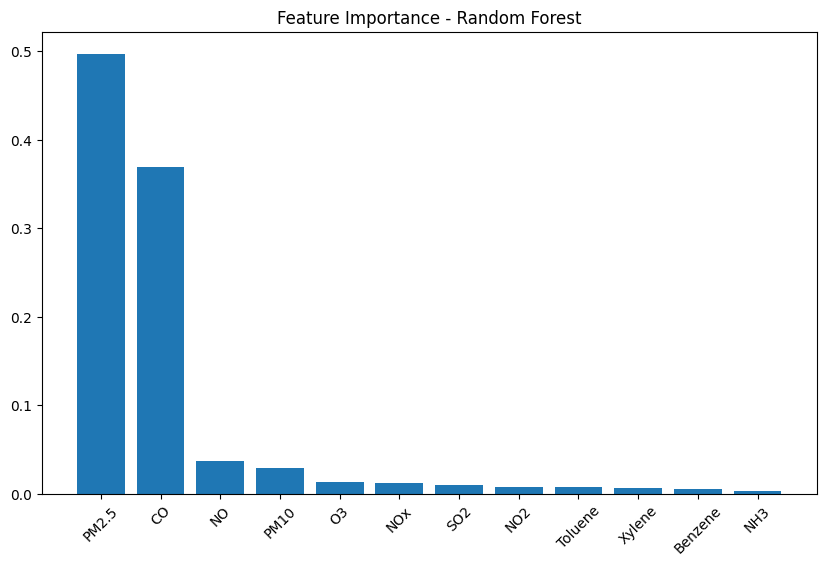

In [6]:
# Step 4: Feature Importance Visualization
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.title("Feature Importance - Random Forest")
plt.show()
